In [53]:
import pandas as pd
from IPython.display import display
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping 

In [69]:
# Start writing code here...

data = pd.read_csv('red-wine.csv')

##split
train = data.sample(frac = 0.7,random_state = 0)
valid = data.drop(train.index)

## scaling 
# max_ = train.max(axis = 0)
# min_ = train.min(axis = 0)

# train = (train - min_) / (max_ - min_)
# valid = (valid - min_) / (max_ - min_)

##train and test
X_train = train.drop('quality',axis = 1)
X_test = valid.drop('quality',axis = 1)

y_train = train.quality
y_test  = valid.quality

##model

model = Sequential([BatchNormalization(input_shape = [11]),
    Dense(1024,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1024,activation= 'relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1024,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(1)
    ])

model.compile(loss= 'mse',optimizer = 'adam')
early_stopping = EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)
red_wine = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size = 256,
epochs = 100,verbose = 0)










In [70]:
final_data = pd.DataFrame(red_wine.history)
final_data

,loss,val_loss
0,39.250393,31.628990
1,31.958815,20.311792
2,29.593166,23.243015
3,27.368862,23.868944
4,25.423702,17.496855
...,...,...
95,0.946594,0.417897
96,0.947987,0.490166
97,1.141603,0.478870
98,0.998092,0.488938


Text(0, 0.5, 'loss of each epochs')

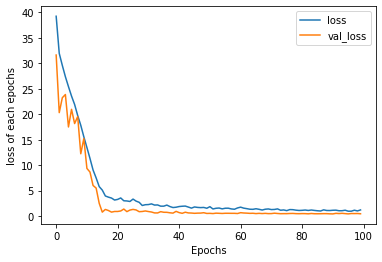

In [71]:
import matplotlib.pyplot as plt
final_data.loc[:,['loss','val_loss']].plot()
plt.xlabel('Epochs')
plt.ylabel('loss of each epochs')

In [72]:
print(f'mininmum validation loss: {final_data.val_loss.min()}')

mininmum validation loss: 0.4115854799747467


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88190736-eb57-4922-a018-2ff5a44a7537' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>